Установка библеотек

In [2]:
!pip install pandas numpy matplotlib statsmodels seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 751.6 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


IMPORT

In [21]:
import random
import numpy as np
import math
import seaborn as sns
import pandas as pd
import warnings
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time

Generation data

TREND IS: 1 , STARTS AT: 1505
TREND IS: 0 , STARTS AT: 2920
TREND IS: 1 , STARTS AT: 4371
TREND IS: 0 , STARTS AT: 5347
TREND IS: 1 , STARTS AT: 6018
TREND IS: -1 , STARTS AT: 7485
TREND IS: 1 , STARTS AT: 8340
TREND IS: 0 , STARTS AT: 9072
TREND IS: 1 , STARTS AT: 10202
TREND IS: -1 , STARTS AT: 11676
TREND IS: 0 , STARTS AT: 12796
TREND IS: -1 , STARTS AT: 13386
TREND IS: 1 , STARTS AT: 13992
TREND IS: -1 , STARTS AT: 14865
TREND IS: 1 , STARTS AT: 15382
TREND IS: 0 , STARTS AT: 16520
TREND IS: 0 , STARTS AT: 17209
TREND IS: 1 , STARTS AT: 18500
TREND IS: 1 , STARTS AT: 19894
TREND IS: 0 , STARTS AT: 20807
TREND IS: 1 , STARTS AT: 21709
TREND IS: -1 , STARTS AT: 23118
TREND IS: 1 , STARTS AT: 24045
TREND IS: 0 , STARTS AT: 24689
TREND IS: 0 , STARTS AT: 26032
TREND IS: 0 , STARTS AT: 26678
TREND IS: 0 , STARTS AT: 28057
TREND IS: -1 , STARTS AT: 28702
TREND IS: 0 , STARTS AT: 29325
TREND IS: -1 , STARTS AT: 30745
TREND IS: 1 , STARTS AT: 32098
TREND IS: 1 , STARTS AT: 32769
TREND IS:

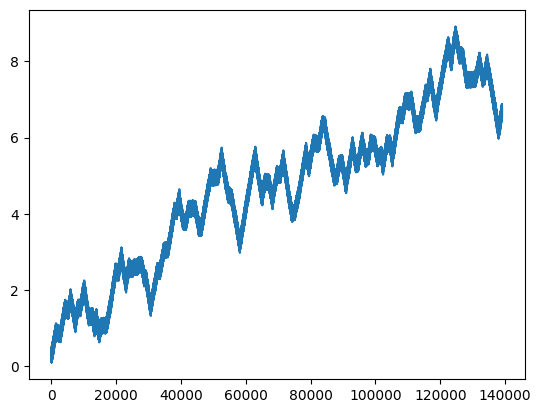

In [24]:
def define_vibration_axis_uniform_random(number_of_intervals):
    """
    Генерирует случайный вибрационный временной ряд с заданным числом интервалов тренда.
    
    Параметры:
    - number_of_intervals: количество интервалов тренда
    
    Возвращает:
    DataFrame с двумя столбцами: "Trend type" (тип тренда) и "Data" (данные о вибрациях)
    """
    n = math.ceil(np.random.uniform(200, 300))
    vib_min = 0.1
    vib_max = 0.5
    vibration_axis = np.random.uniform(vib_min, vib_max, n)
    code = [0] * n
    trend_n = n
    
    start_time = time.time()
    while time.time() - start_time < 10:  #Поменять время, если надо
        tmp = random.choice([0, 1, -1])
        variation = tmp
        j_range = math.ceil(np.random.uniform(500, 1500))
        for j in range(j_range):
            new_vibration = np.random.uniform(np.average(vibration_axis[-200:]) - (-1 * vib_min + vib_max) / 2 + variation * 0.05,
                                              np.average(vibration_axis[-200:]) + (-1 * vib_min + vib_max) / 2 + variation * 0.05, 1)
            vibration_axis = np.append(vibration_axis, new_vibration)
        if tmp == -1:
            tmp = 2
        code.extend(itertools.repeat(tmp, j_range))
        trend_n += j_range
        print("TREND IS:", variation, ", STARTS AT:", trend_n)
    
    print("TOTAL ITERATIONS:", len(vibration_axis))
    
    # Визуализация данных
    sns.lineplot(data=vibration_axis)
    
    df = pd.DataFrame({"Trend type": code, "Data": vibration_axis})
    return df

vib_axis_df = define_vibration_axis_uniform_random(3)

Применения ARIMA с генерацией данных

TREND IS: 1 , STARTS AT: 1525
TOTAL ITERATIONS: 1525
Next observation: 0.12321851687697893
Forecast: 0.4252494343652831


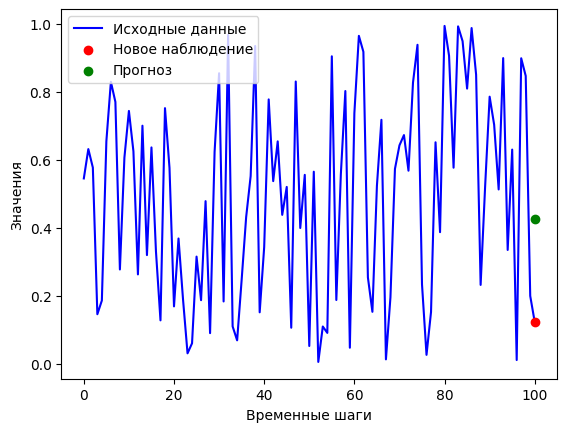

TREND IS: 0 , STARTS AT: 2356
TOTAL ITERATIONS: 2356
Next observation: 0.933322258708297
Forecast: 0.5037785588508008


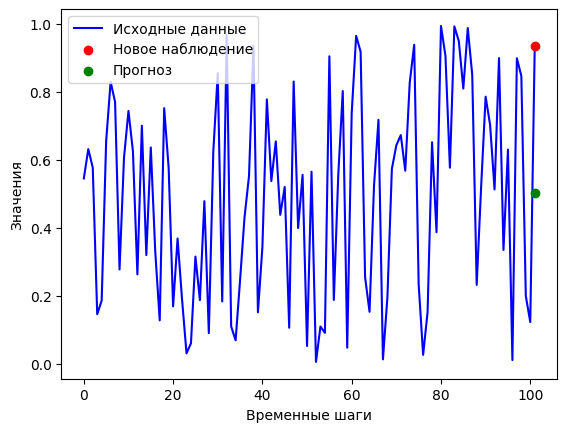

TREND IS: 1 , STARTS AT: 3803
TOTAL ITERATIONS: 3803
Next observation: 0.22505802045644308
Forecast: 0.5304839821597729


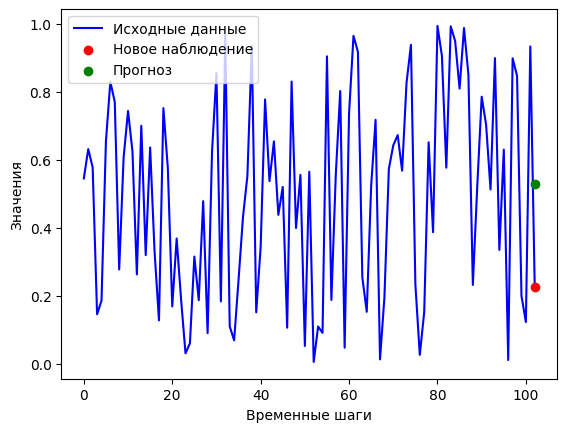

TREND IS: 0 , STARTS AT: 5144
TOTAL ITERATIONS: 5144
Next observation: 0.6458805556556992
Forecast: 0.43371844710618684


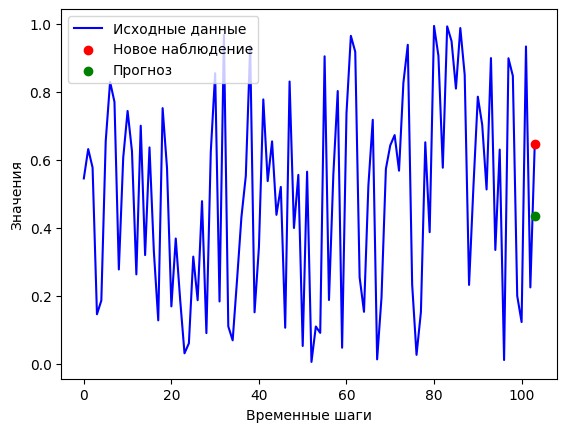

TREND IS: 0 , STARTS AT: 5689
TOTAL ITERATIONS: 5689
Next observation: 0.13486063925179648
Forecast: 0.5460085932021084


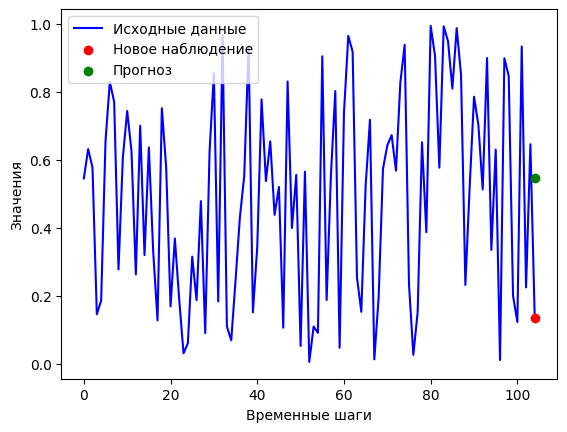

TREND IS: -1 , STARTS AT: 6944
TOTAL ITERATIONS: 6944
Next observation: 0.6846364419865356
Forecast: 0.4304811903954632


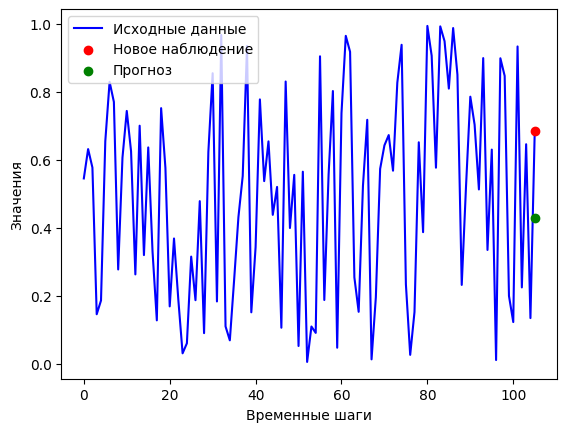

TREND IS: -1 , STARTS AT: 7769
TOTAL ITERATIONS: 7769
Next observation: 0.6418650814871577
Forecast: 0.3890061674337577


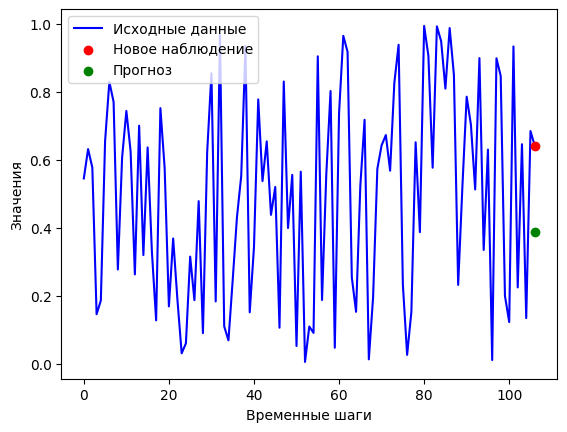

TREND IS: 1 , STARTS AT: 8404
TOTAL ITERATIONS: 8404
Next observation: 0.2056609449304989
Forecast: 0.5879024044590906


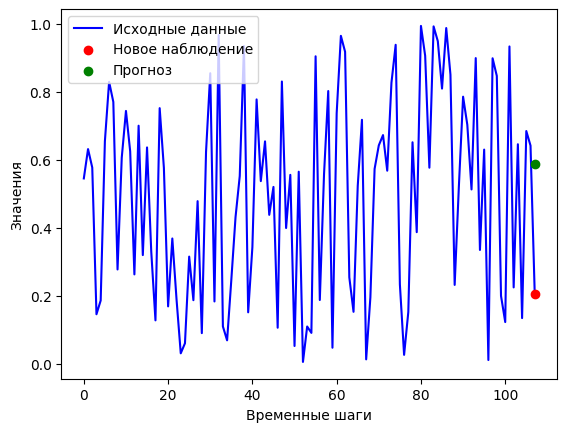

TREND IS: 0 , STARTS AT: 9708
TOTAL ITERATIONS: 9708
Next observation: 0.6517111780136281
Forecast: 0.37141178888641246


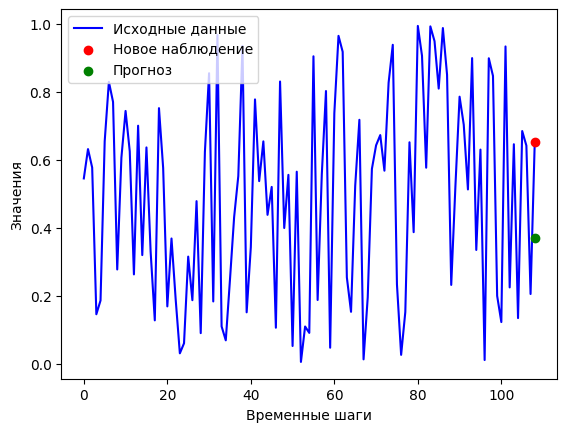

TREND IS: 1 , STARTS AT: 10348
TOTAL ITERATIONS: 10348
Next observation: 0.7801341359932055
Forecast: 0.5476925179190121


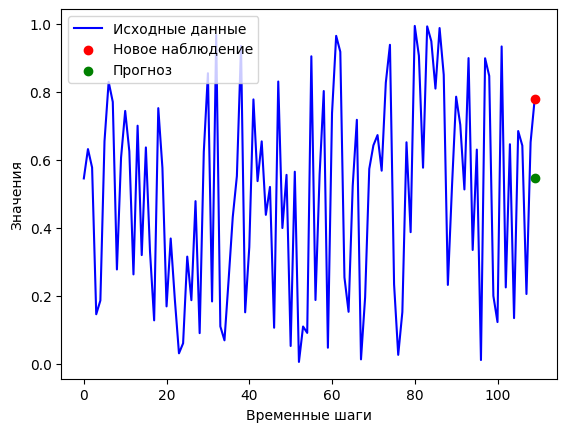

TREND IS: -1 , STARTS AT: 11025
TOTAL ITERATIONS: 11025
Next observation: 0.07106842384311973
Forecast: 0.5149049463683808


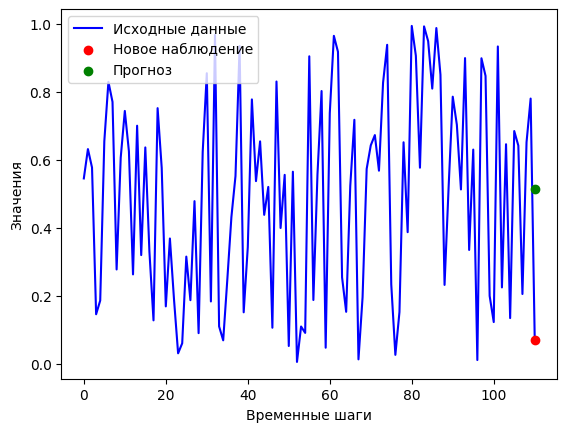

TREND IS: 1 , STARTS AT: 11658
TOTAL ITERATIONS: 11658
Next observation: 0.8864994556376429
Forecast: 0.4559057295219592


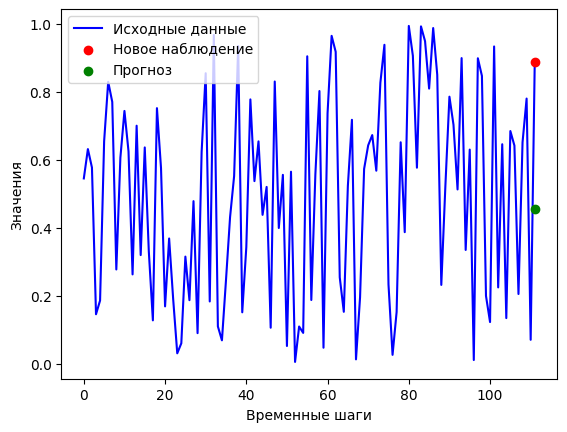

TREND IS: -1 , STARTS AT: 13147
TOTAL ITERATIONS: 13147
Next observation: 0.41815655987683154
Forecast: 0.600573126522147


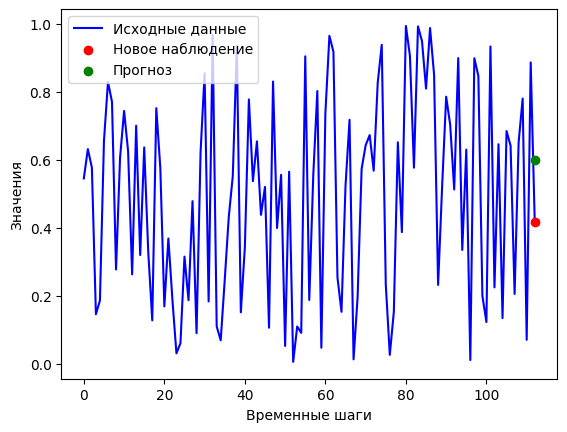

TREND IS: 0 , STARTS AT: 13809
TOTAL ITERATIONS: 13809
Next observation: 0.31275218874745037
Forecast: 0.4822731102568301


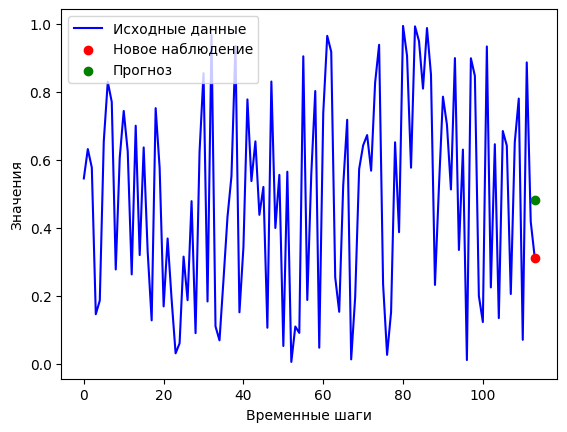

TREND IS: -1 , STARTS AT: 14788
TOTAL ITERATIONS: 14788
Next observation: 0.2729203997532288
Forecast: 0.4952286889574109


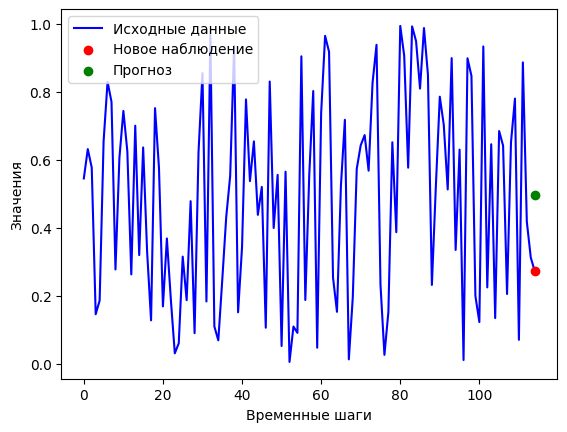

TREND IS: 1 , STARTS AT: 15445
TOTAL ITERATIONS: 15445
Next observation: 0.6488392490053003
Forecast: 0.5233428654053762


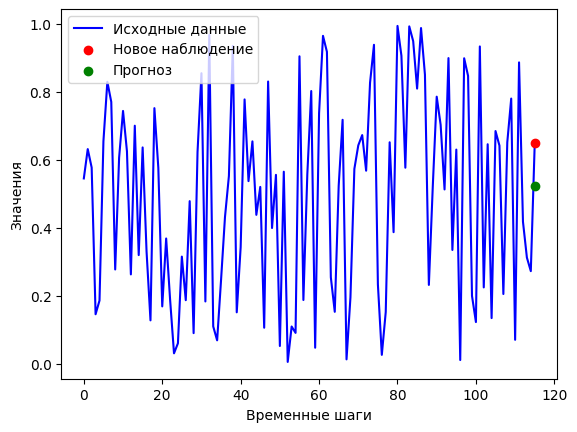

TREND IS: 1 , STARTS AT: 16510
TOTAL ITERATIONS: 16510
Next observation: 0.7235263816825719
Forecast: 0.38715755866941604


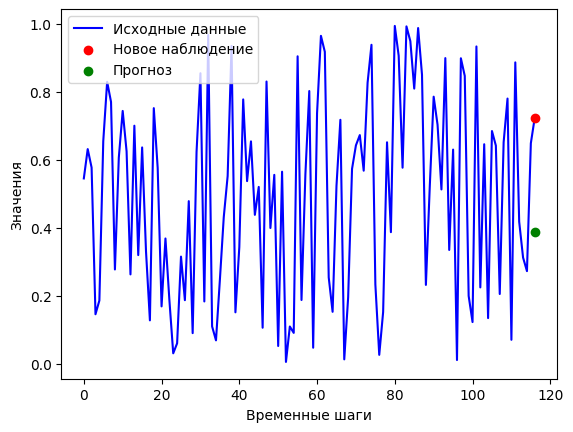

TREND IS: 0 , STARTS AT: 17734
TOTAL ITERATIONS: 17734
Next observation: 0.5231988384924537
Forecast: 0.524124556234549


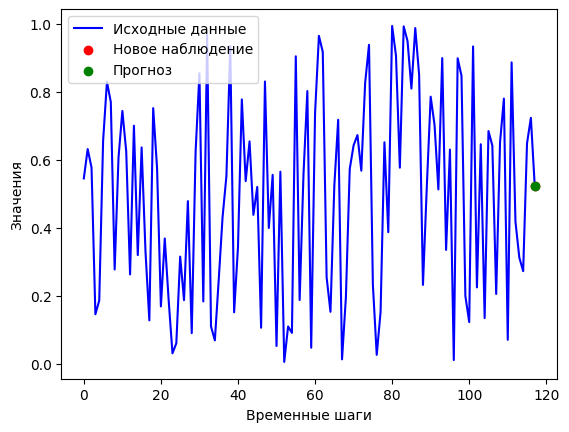

TREND IS: 0 , STARTS AT: 18278
TOTAL ITERATIONS: 18278
Next observation: 0.9295975865362948
Forecast: 0.48025848872682503


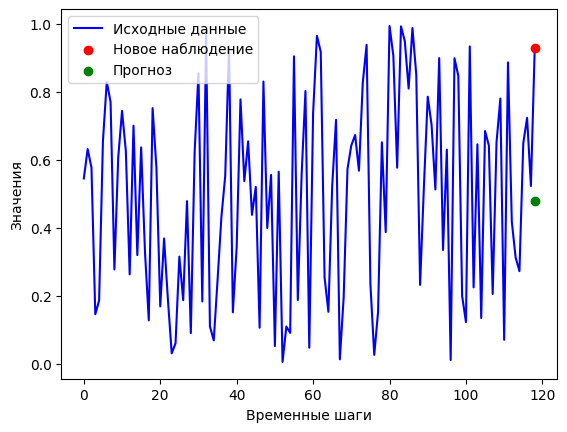

TREND IS: 0 , STARTS AT: 18843
TOTAL ITERATIONS: 18843
Next observation: 0.8175631941336262
Forecast: 0.6106599104004292


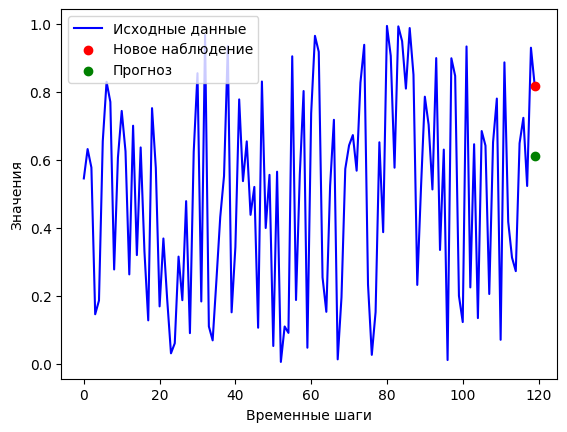

TREND IS: 1 , STARTS AT: 19639
TOTAL ITERATIONS: 19639
Next observation: 0.6815873523027559
Forecast: 0.6523279292351818


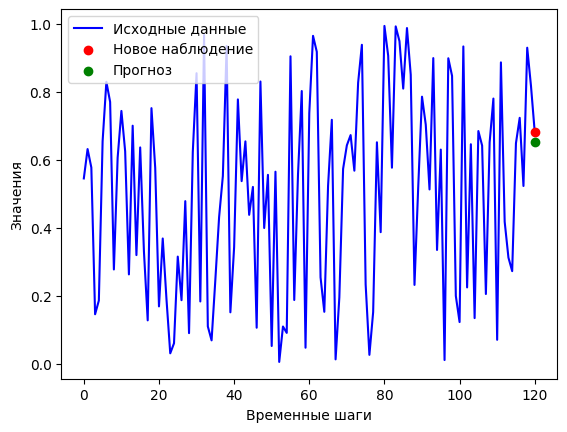

TREND IS: -1 , STARTS AT: 20520
TOTAL ITERATIONS: 20520
Next observation: 0.6696747219242889
Forecast: 0.716100452405048


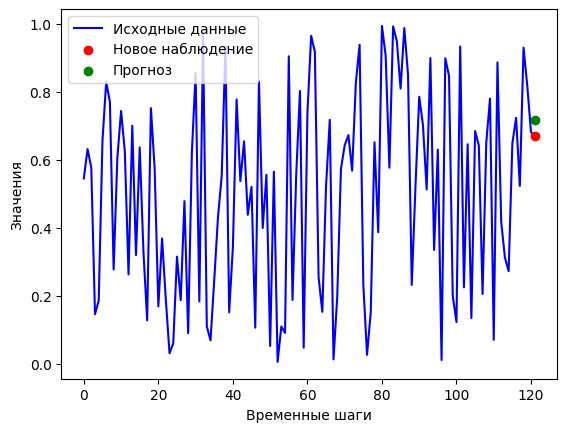

TREND IS: -1 , STARTS AT: 21641
TOTAL ITERATIONS: 21641
Next observation: 0.6625038953266219
Forecast: 0.7605855570937706


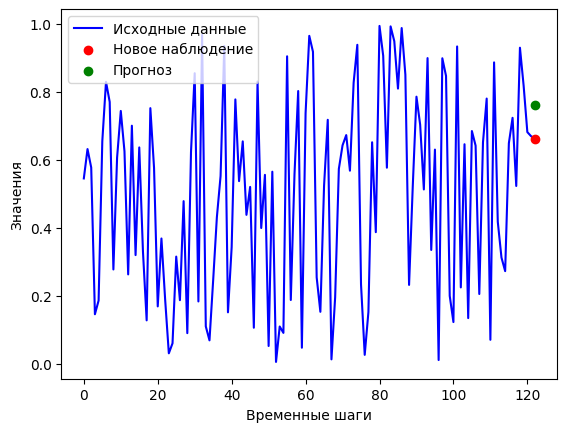

TREND IS: 0 , STARTS AT: 22439
TOTAL ITERATIONS: 22439
Next observation: 0.7096741041307519
Forecast: 0.7014958584967024


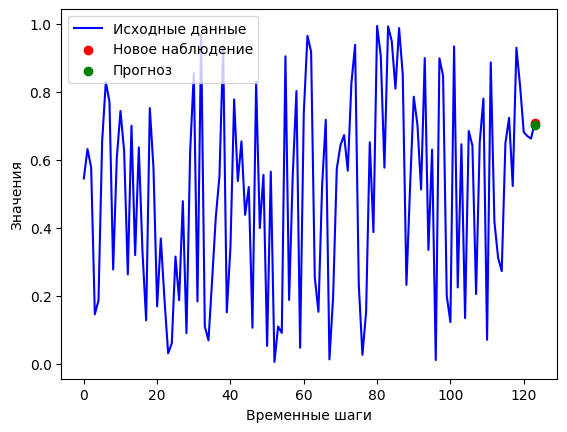

TREND IS: 1 , STARTS AT: 23550
TOTAL ITERATIONS: 23550
Next observation: 0.33582380097243647
Forecast: 0.7300680103855798


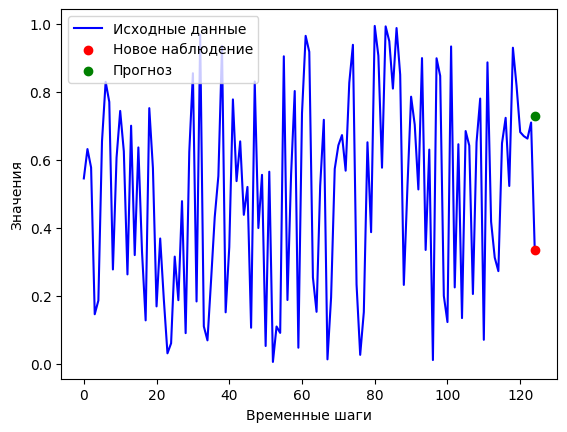

TREND IS: 1 , STARTS AT: 24122
TOTAL ITERATIONS: 24122
Next observation: 0.06828254804994616
Forecast: 0.6360152235059963


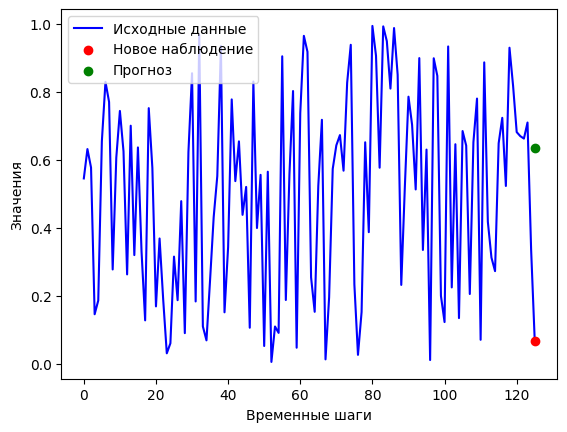

<Figure size 640x480 with 0 Axes>

'\np = 5  модель использует 5 предыдущих значений временного ряда для компоненты авторегрессии.\nd = 1  используется первая разность временного ряда.\nq = 0  не используется компонента скользящего среднего.\n'

In [43]:
def forecast_realtime(model, last_observation):
    """
    Прогнозирует следующее значение в реальном времени.
    
    Параметры:
    - model: обученная модель ARIMA
    - last_observation: последнее наблюдение временного ряда
    
    Возвращает:
    Прогноз следующего значения
    """
    forecast = model.forecast(steps=1)[0]
    return forecast

def train_arima_model(data):
    """
    Обучает модель ARIMA на исходных данных.
    
    Параметры:
    - data: временной ряд для обучения модели
    
    Возвращает:
    Обученную модель ARIMA
    """
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    return model_fit

# Генерация начальных данных
initial_data = np.random.rand(100)

# Обучение модели ARIMA на начальных данных
model = train_arima_model(initial_data)

# Генерация данных в реальном времени
n = math.ceil(np.random.uniform(200, 300))
vib_min = 0.1
vib_max = 0.5
vibration_axis = np.random.uniform(vib_min, vib_max, n)
code = [0] * n
trend_n = n

# Прогнозирование и визуализация в реальном времени
start_time = time.time()
while time.time() - start_time < 10:  # Замените 10 на нужное вам время
    tmp = random.choice([0, 1, -1])
    variation = tmp
    j_range = math.ceil(np.random.uniform(500, 1500))
    for j in range(j_range):
        new_vibration = np.random.uniform(np.average(vibration_axis[-200:]) - (-1 * vib_min + vib_max) / 2 + variation * 0.05,
                                          np.average(vibration_axis[-200:]) + (-1 * vib_min + vib_max) / 2 + variation * 0.05, 1)
        vibration_axis = np.append(vibration_axis, new_vibration)
    
    if tmp == -1:
        tmp = 2
    code.extend(itertools.repeat(tmp, j_range))
    trend_n += j_range
    print("TREND IS:", variation, ", STARTS AT:", trend_n)
    print("TOTAL ITERATIONS:", len(vibration_axis))
    
    next_observation = np.random.rand() 
    forecast = forecast_realtime(model, initial_data[-1])
    print("Next observation:", next_observation)
    print("Forecast:", forecast)
    
    # Обновление данных и модели
    initial_data = np.append(initial_data, next_observation)
    model = train_arima_model(initial_data)


# Визуализация
    plt.plot(initial_data, color='blue', label='Исходные данные')
    plt.scatter(len(initial_data) - 1, next_observation, color='red', label='Новое наблюдение', zorder=5)
    plt.scatter(len(initial_data) - 1, forecast, color='green', label='Прогноз', zorder=5)
    plt.xlabel('Временные шаги')
    plt.ylabel('Значения')
    plt.legend()
    plt.draw()
    plt.pause(0.1)  # Пауза для обновления графика
    plt.clf()
    #plt.cla()

plt.ioff()  # Выключение интерактивного режима после завершения цикла
plt.show()

"""
p = 5  модель использует 5 предыдущих значений временного ряда для компоненты авторегрессии.
d = 1  используется первая разность временного ряда.
q = 0  не используется компонента скользящего среднего.
"""